In [1]:

import pickle
import os
import pandas as pd

data_dir = '/home/gabriel/Dropbox/UCL/Thesis/Data'
four_model_metrics_path = 'first_random_iter_run.pkl'
gcnn_metrics_path = 'first_random_GCNN_100epoch_iter_run.pkl'
save_path = os.path.join(data_dir,four_model_metrics_path)
pickle_off = open(save_path,'rb')
four_model=pickle.load(pickle_off)
pickle_off.close() 
save_path = os.path.join(data_dir,gcnn_metrics_path)
pickle_off = open(save_path,'rb')
gcnn_model=pickle.load(pickle_off)
pickle_off.close() 


merged_df = gcnn_model.append(four_model)


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib notebook
found_percent_list = []
for _,row in merged_df.iterrows():
    #if a test row, then calculate percent found
    if row['test_train'] == 'test':
        num_actives_remaining = row['supp_Active']
        AID = row['AID']
        classifier = row['Classifier']
        iter_num = row['Iteration Number']
        num_actives_in_first_test = merged_df[((merged_df['AID']==AID) & (merged_df['Classifier'] == classifier) 
                                         & (merged_df['Iteration Number'] == 0) & (merged_df['test_train'] == 'test'))]['supp_Active']
        found_percent_list.append(1.0-float(num_actives_remaining/num_actives_in_first_test))
    #if train, append an 'nan'
    else:
        found_percent_list.append(np.nan)
merged_df['Percent Active Found']=found_percent_list

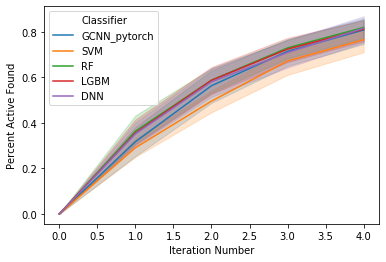

In [2]:
sns.lineplot(x="Iteration Number", y="Percent Active Found",
             hue="Classifier", data=merged_df.dropna())

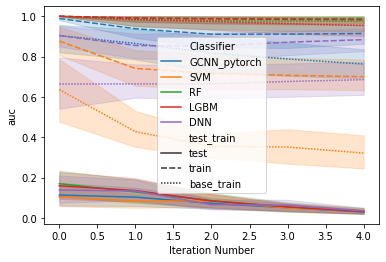

In [3]:
sns.lineplot(x="Iteration Number", y="auc",
             hue="Classifier", style="test_train",
             data=merged_df)

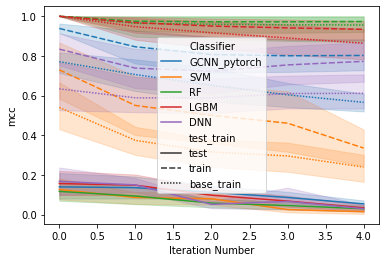

In [4]:
sns.lineplot(x="Iteration Number", y="mcc",
             hue="Classifier", style="test_train",
             data=merged_df)

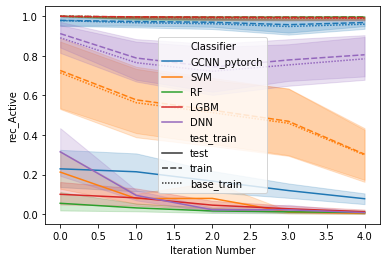

In [5]:
sns.lineplot(x="Iteration Number", y="rec_Active",
             hue="Classifier", style="test_train",
             data=merged_df)


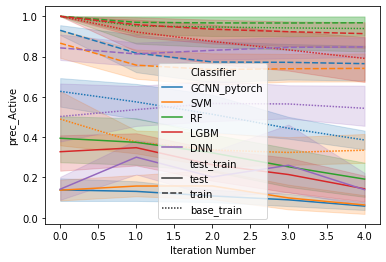

In [6]:
sns.lineplot(x="Iteration Number", y="prec_Active",
             hue="Classifier", style="test_train",
             data=merged_df)

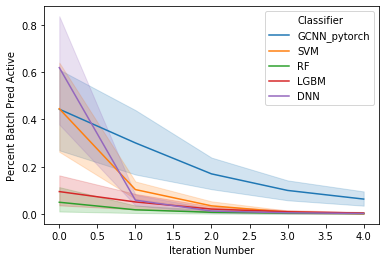

/home/gabriel/anaconda3/envs/RD_ZONE/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<Figure size 432x288 with 0 Axes>

In [7]:
percent_pred_active_list = []
for _,row in merged_df.iterrows():
    #if a test row, then calculate percent found
    if row['test_train'] == 'test':
        [tn, fp], [fn, tp] = row['conf_matrix']
        num_pred_active = (tp + fp)
        num_actives_remaining = row['supp_Active']
        AID = row['AID']
        classifier = row['Classifier']
        iter_num = row['Iteration Number']
        batch_size = np.sum(np.sum(merged_df[((merged_df['AID']==AID) & (merged_df['Classifier'] == classifier) 
                                         & (merged_df['Iteration Number'] == 0) & (merged_df['test_train'] == 'train'))]['conf_matrix']))
        percent_pred_active_list.append(num_pred_active/batch_size)
    #if train, append an 'nan'
    else:
        percent_pred_active_list.append(np.nan)
merged_df['Percent Batch Pred Active']=percent_pred_active_list
sns.lineplot(x="Iteration Number", y="Percent Batch Pred Active",
             hue="Classifier", data=merged_df.dropna())
plt.show()
plt.clf()

melted = merged_df.melt(id_vars = ['AID','Classifier','Iteration Number','Embedding','test_train'],var_name = 'Metric',value_name='Score')
mcc_auc_plot = melted[(melted['Metric'].isin(['auc','mcc']))&
                    (melted['test_train']=='test')]
active_find_plot = melted[(melted['Metric'].isin(['Percent Active Found','Percent Batch Pred Active']))&
                    (melted['test_train']=='test')]
prec_rec_plot = melted[(melted['Metric'].isin(['prec_Active','rec_Active']))&
                    (melted['test_train']=='test')]
mcc_auc_plot.Score = mcc_auc_plot.Score.astype(float)
active_find_plot.Score = active_find_plot.Score.astype(float)
prec_rec_plot.Score = prec_rec_plot.Score.astype(float)

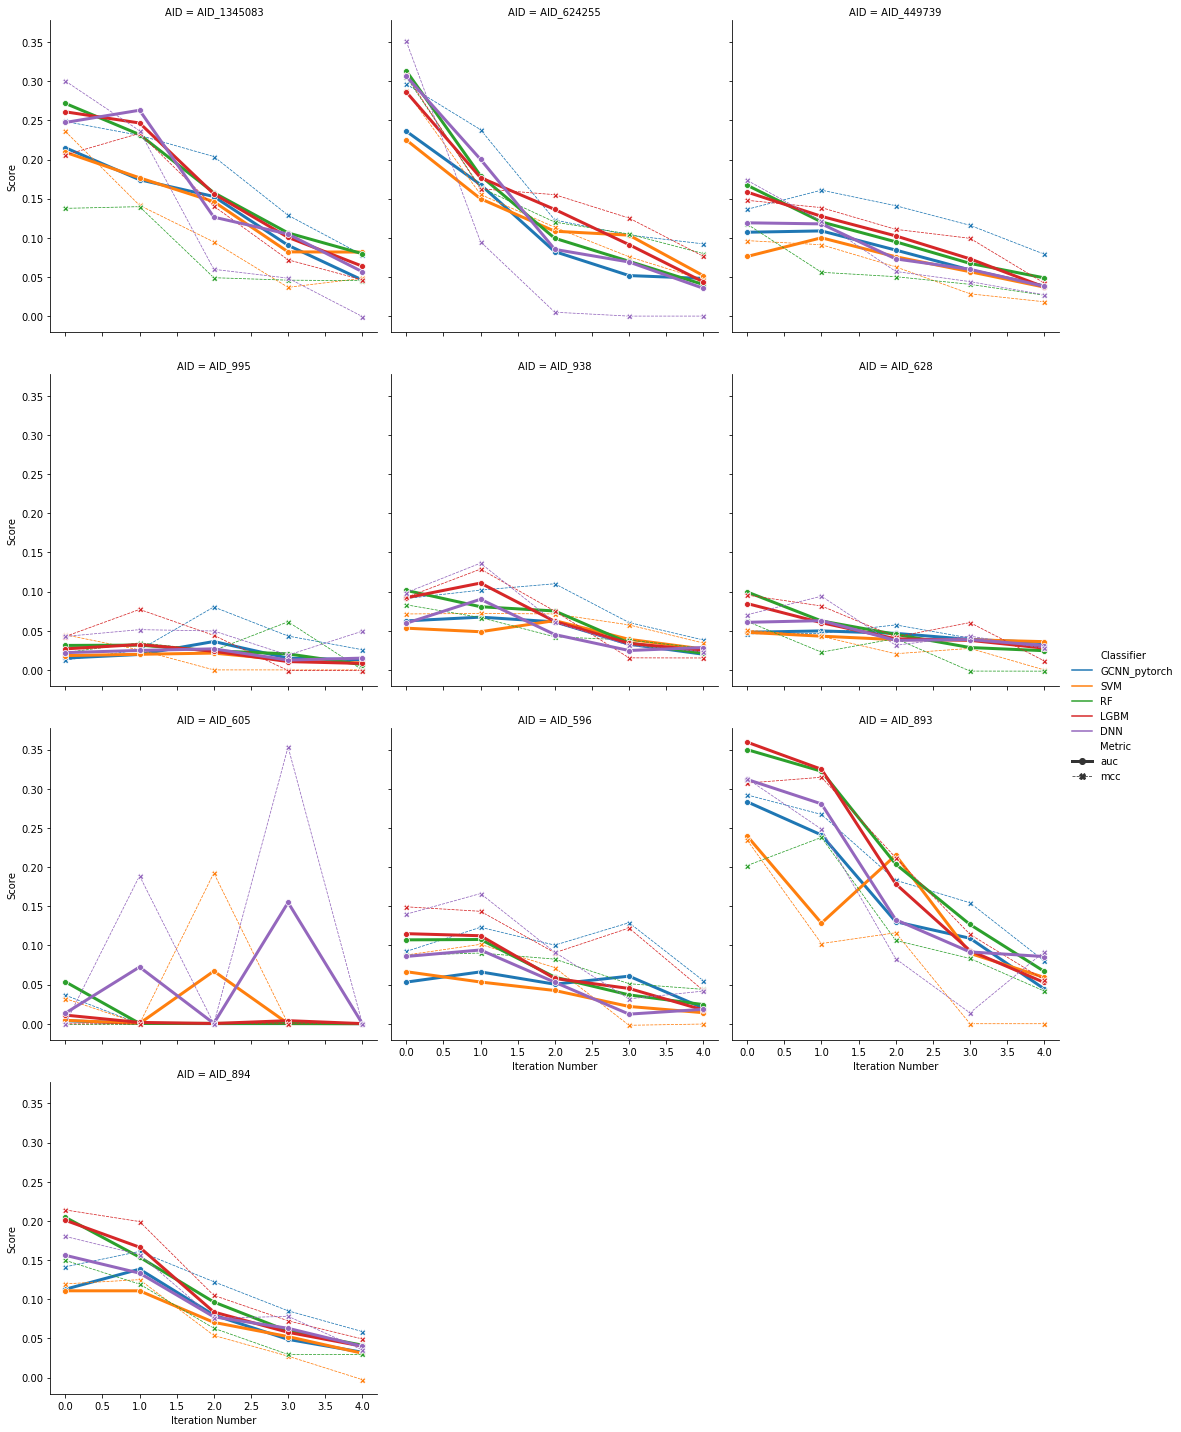

In [8]:
g = sns.relplot(x="Iteration Number", y="Score", hue='Classifier',style = 'Metric',size="Metric", col="AID", col_wrap=3, data=mcc_auc_plot,kind='line',legend='full',markers= True,ci = None )


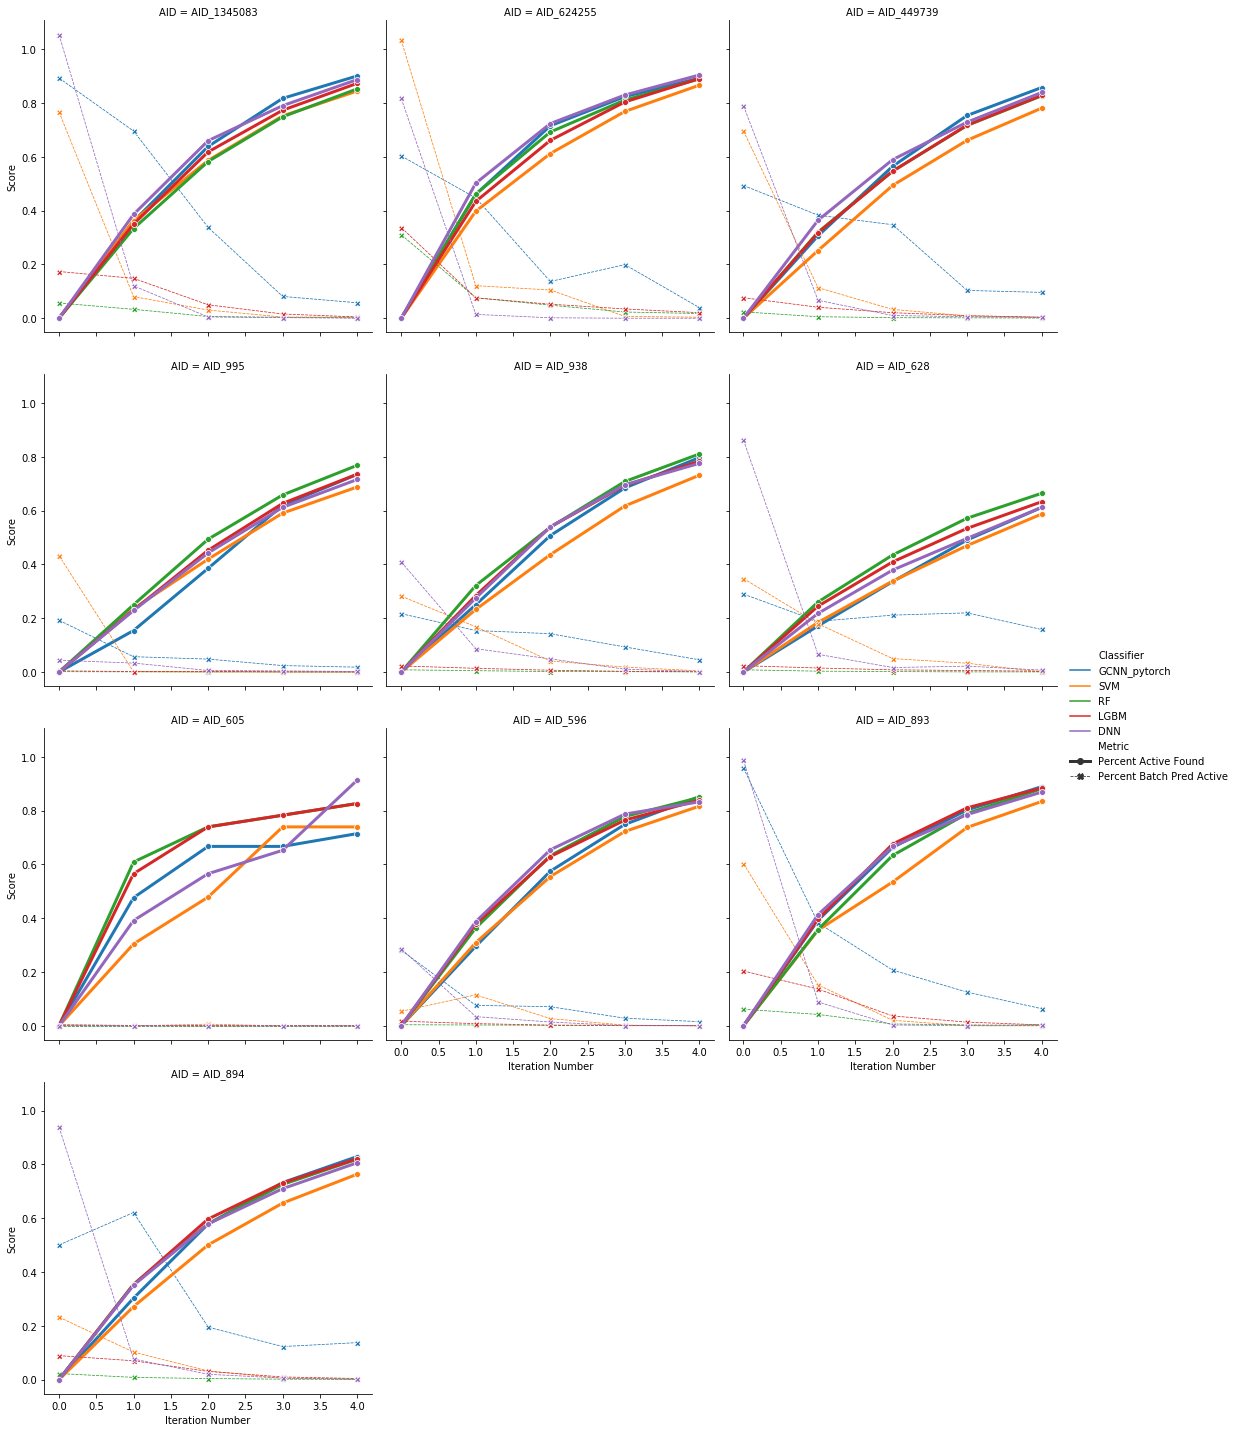

In [9]:
g = sns.relplot(x="Iteration Number", y="Score", hue='Classifier',style="Metric", size="Metric",col="AID", col_wrap=3, data=active_find_plot,kind='line',legend='full',markers= True,ci = None )


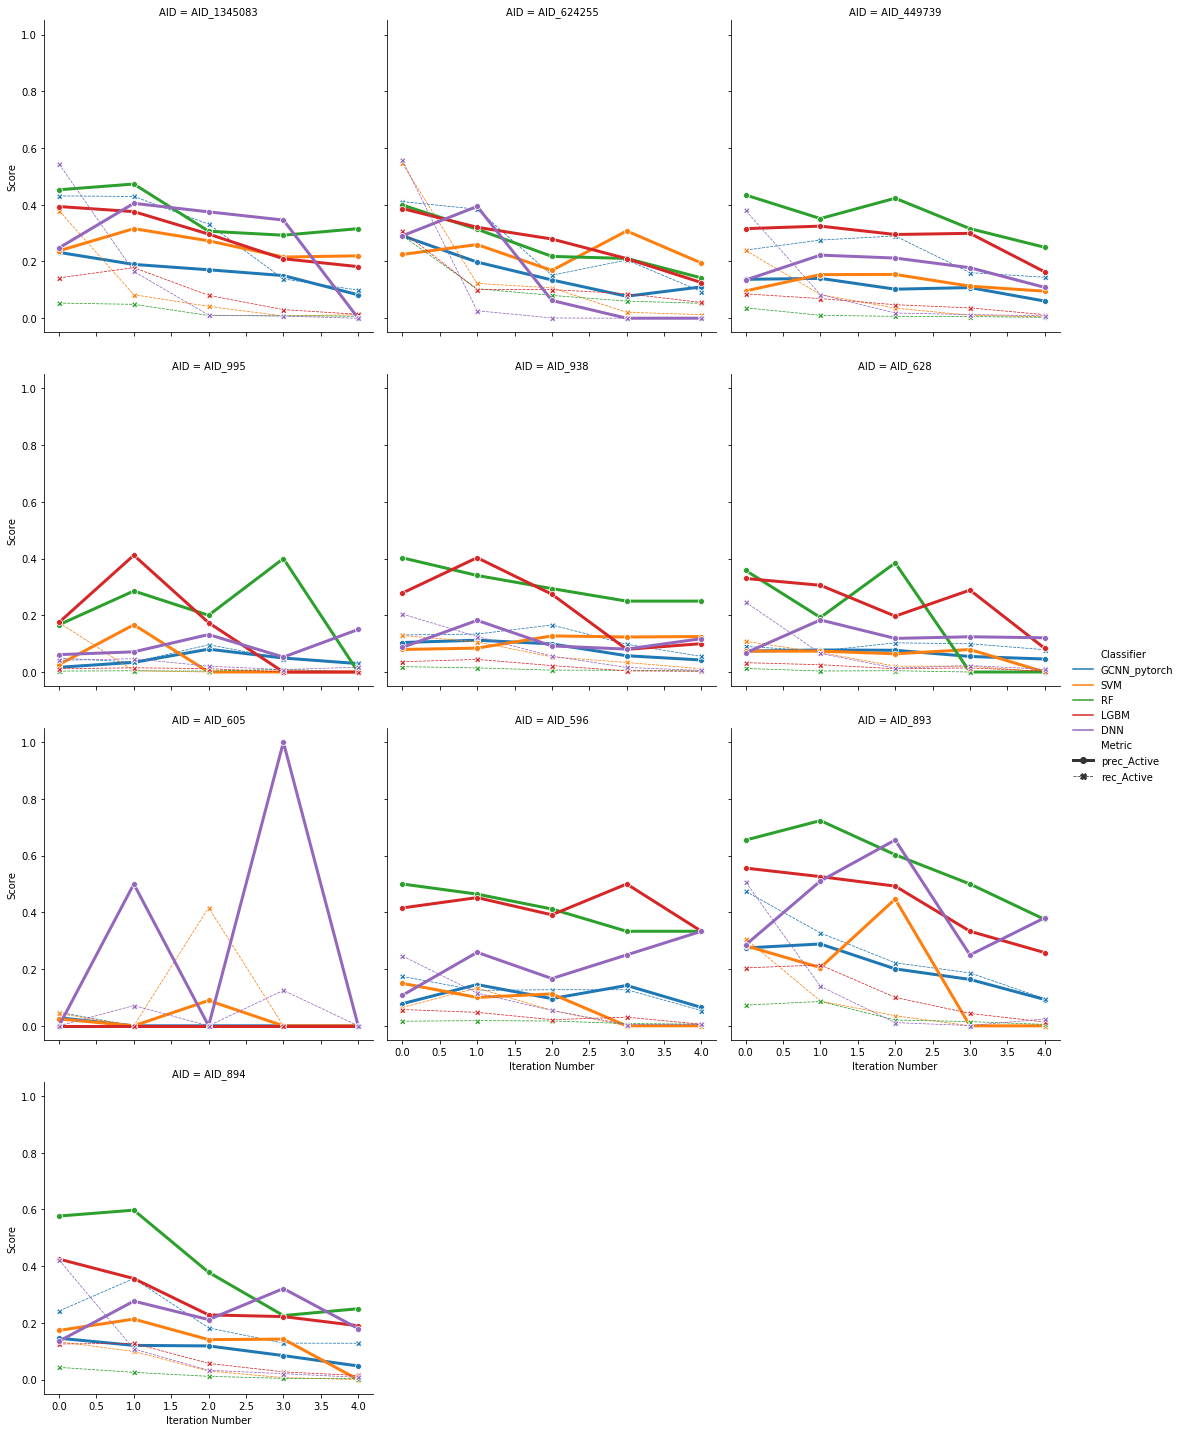

In [10]:
g = sns.relplot(x="Iteration Number", y="Score", hue='Classifier',style="Metric", size="Metric",col="AID", col_wrap=3, data=prec_rec_plot,kind='line',legend='full',markers= True,ci = None )
